# Clean and Analyze Education Employee Exit Surveys

## Objectives
*Why do employees resign? What are the drivers ?*
*How do age or tenure impact resignation?*
## Data sources
*Dept of Education, Training, Employment (DETE)*
*Technical and Further Education (TAFE) institute in Queensland, Australia*
*Combination of data sources*





In [1]:
import pandas as pd
import numpy as np


dete_survey = pd.read_csv("dete_survey.csv", na_values='Not Stated')
tafe_survey = pd.read_csv("tafe_survey.csv")

## Exploring the DETE dataset

In [2]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
dete_survey.isnull().sum()


ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

## Observations on datasets

*Content*
They both cover similar data with different column names. The information is essentially about
* each survey, such as survey ID, surveyed employee profile, demographic information
* reasons for job termination with boolean column for each reason type
* how surveyed employees see the work environment, stored as boolean columns. These columns are deemed unnecessary for the analysis and will be removed

*Null values*
* DETE survey: Some columns have "Not Stated" rather than "NaN", which has been adjusted with the na_values parameter in pd.read_csv function



In [4]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
tafe_survey.describe(include='all')

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
count,7.020000e+02,702,702,695.000000,701,437,437,437,437,437,...,594,587,586,581,596,596,596,596,596,596
unique,NaN,12,2,NaN,6,2,2,2,2,2,...,2,2,2,2,2,9,5,9,7,7
top,NaN,Brisbane North Institute of TAFE,Non-Delivery (corporate),NaN,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,56 or older,Permanent Full-time,Administration (AO),Less than 1 year,Less than 1 year
freq,NaN,161,432,NaN,340,375,336,420,403,411,...,536,512,488,416,389,162,237,293,147,177
mean,6.346026e+17,NaN,NaN,2011.423022,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.515071e+14,NaN,NaN,0.905977,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,6.341330e+17,NaN,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,6.343954e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6.345835e+17,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6.348005e+17,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removal of unnecessary columns
Removal of data related to employee's answers on work environment questions

In [6]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

## Renaming columns

Dete survey column name changes
* lowercase
* removal of end of string white spaces
* underscores instead of white spaces

Tafe survey column name changes
* specific column names mapped to Dete survey column names

In [7]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [8]:
tafe_survey_renaming_dict={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
}

In [9]:
tafe_survey_updated.rename(tafe_survey_renaming_dict, axis=1, inplace=True)

In [10]:
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   702 non-null    float64
 1   Institute                                            702 non-null    object 
 2   WorkArea                                             702 non-null    object 
 3   cease_date                                           695 non-null    float64
 4   separationtype                                       701 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    437 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   437 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  437 non-null    object 
 8   Contributing Factors. Ill Health                     437 non-null    o

## Focus on separation type
This is relevant as we want to understand what drives resignations
We first look at the distribution of values for the separation type columns
We then select the values which relate to resignation

In [11]:
print(dete_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


In [12]:
print(tafe_survey_updated['separationtype'].value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


In [13]:
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0]

In [14]:
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [15]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'] == 'Resignation'].copy()


In [16]:
print(tafe_resignations['separationtype'].value_counts())
print(dete_resignations['separationtype'].value_counts())

Resignation    340
Name: separationtype, dtype: int64
Resignation    311
Name: separationtype, dtype: int64


## Data consistency checks
* cease dates and start dates are before the current date
* start date should be 1940 or later
First, we need to convert the date formats to manipulate the data

In [17]:
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64


In [18]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype("float")

In [19]:
print(dete_resignations['cease_date'].value_counts().sort_index())

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64


In [20]:
print(dete_resignations['dete_start_date'].value_counts().sort_index())

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64


In [21]:
print(tafe_resignations['cease_date'].value_counts().sort_index())

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64


**DETE survey date consistency findings**
* Most surveyed employees have ceased working in 2012 and 2013 and a few in 2014. 2 employees ceased in 2010 and 1 in 2006. These years appear as outliers.
* DETE contract start dates range from 1963 to 2013. Though the 1963 start date survey appears as an outlier, given the second oldest start year is 1971


**TAFE survey date consistency findings**
* Cease dates are consistent with a distribution ranging from 2009 to 2013

In [22]:
dete_resignations = dete_resignations[dete_resignations['cease_date'] >= 2012]

In [23]:
dete_resignations = dete_resignations[dete_resignations['dete_start_date'] >= 1971]

**Generate tenure duration ('institute service') column for the DETE survey**

In [24]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

In [25]:
dete_resignations['institute_service'].value_counts().sort_index()

0.0     19
1.0     22
2.0     14
3.0     19
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     3
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
Name: institute_service, dtype: int64

# Analysis of dissatisfied employees

## Preparing the dissatisfaction data

**Dissatisfaction information simplification and synthesis**
* Dissatisfaction and Job Dissatisfaction columns are modified to TRUE/FALSE 
* DETE survey and TAFE survey are added a synthetic dissatisfied column: All relevant columns are merged into a single one indicating dissatisfaction as a reason for ceasing the work contract

In [26]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts().sort_index()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [27]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts().sort_index()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [29]:
def update_val(x):
    if x == '-':
        return False
    elif pd.isnull(x):
        return np.nan
    else:
        return True

In [30]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_val).any(1, skipna='False')

In [32]:
tafe_resignations["dissatisfied"].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [33]:
dete_dissatisfaction_columns = {
    'job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload'
}
dete_resignations["dissatisfied"] = dete_resignations[dete_dissatisfaction_columns].any(axis=1, skipna=False)

In [34]:
dete_resignations["dissatisfied"].value_counts()

True     137
False    132
Name: dissatisfied, dtype: int64

In [35]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

# Combining both data sets

In [36]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [37]:
dete_resignations_up.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service,dissatisfied,institute
3,4,Resignation,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0,False,DETE
5,6,Resignation,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0,True,DETE


In [38]:
tafe_resignations_up.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False,TAFE


In [39]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [40]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                2
aboriginal                                               7
nesb                                                     8
disability                                               8
business_unit                                           28
classification                                         143
region                                                 230
role_start_date                                        259
maternity/family                                       269
relocation                                             269
study/travel                                           269
workload                                               269
traumatic_incident                                     269
employment_conditions                                  269
work_life_balance                                      269
ill_health                                             2

In [41]:
#Remove the columns with lmess than 500 non null values
combined_updated = combined.dropna(thresh=500, axis=1).copy()

In [42]:
combined_updated.notnull().sum().sort_values()

gender               555
position             556
age                  557
employment_status    559
institute_service    559
cease_date           604
id                   609
separationtype       609
dissatisfied         609
institute            609
dtype: int64

## Introduce job tenure
In order to simplify the analysis, we group employees by job tenure categories rather than specific number of years:
* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [43]:
combined_updated['institute_service'] = combined_updated['institute_service'].astype(str)

In [44]:
combined_updated['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
nan                   50
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   19
0.0                   19
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
20.0                   7
15.0                   7
22.0                   6
17.0                   6
12.0                   6
14.0                   6
10.0                   6
16.0                   5
18.0                   5
24.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
11.0                   3
39.0                   3
28.0                   2
25.0                   2
26.0                   2
36.0                   2
30.0                   2


In [45]:
extract_years_of_service = combined_updated['institute_service'].str.extract(r"(\d+)")

In [46]:
combined_updated['years_of_service'] = combined_updated['institute_service'].str.extract(r"(\d+)")

In [47]:
combined_updated['years_of_service'].value_counts(dropna=False).sort_index()

0       19
1      159
10       6
11      29
12       6
13       8
14       6
15       7
16       5
17       6
18       5
19       3
2       14
20      17
21       3
22       6
23       4
24       4
25       2
26       2
27       1
28       2
29       1
3       82
30       2
31       1
32       3
33       1
34       1
35       1
36       2
38       1
39       3
4       16
41       1
42       1
5       56
6       17
7       34
8        8
9       14
NaN     50
Name: years_of_service, dtype: int64

In [48]:
combined_updated['years_of_service'] = combined_updated['years_of_service'].astype(float)

In [49]:
combined_updated['years_of_service'].value_counts(dropna=False).sort_index()

0.0      19
1.0     159
2.0      14
3.0      82
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     29
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
NaN      50
Name: years_of_service, dtype: int64

**Map the years of service to coarser grained categories**

In [50]:
def map_years_to_career_stage_category(val):
    if val < 3:
        return ('New')
    elif val < 7:
        return ('Experienced')
    elif val < 11:
        return ('Established')
    else:
        return ('Veteran')

In [51]:
combined_updated['service_cat'] = combined_updated['years_of_service'].apply(map_years_to_career_stage_category)

In [52]:
combined_updated['service_cat'].value_counts(dropna=False)

New            192
Veteran        184
Experienced    171
Established     62
Name: service_cat, dtype: int64

**Cleaning of dissatisfied column**

In [53]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    381
True     228
Name: dissatisfied, dtype: int64

## Analysis of dissatisfaction by service duration category ##

In [60]:
pivot_table = combined_updated.pivot_table(values='dissatisfied', index='service_cat')

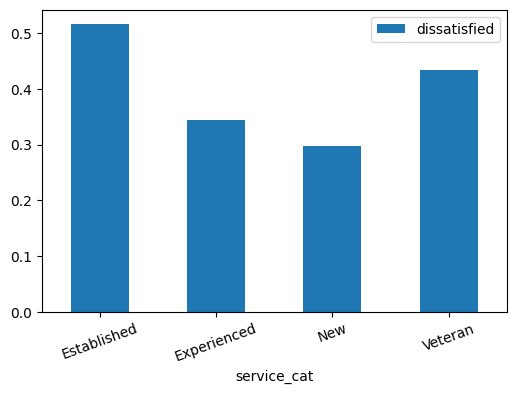

In [63]:
import matplotlib
%matplotlib inline
pivot_table.plot(kind='bar', rot=20) 

# Conclusions #
Established and Veteran employees, with 7 years of tenur or more, and who have resigned, express more dissatisfaction with the job in general 